# Практикум по линейным моделям в машинном обучении

## Импорт необходимых библиотек

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Устанавливаем сид для воспроизводимости результатов
np.random.seed(42)
plt.style.use('default')

---

## Блок 1: Основы линейной регрессии

### Задание 1.1: Понимание простейшей линейной модели y = wx + b

**Теория:**
Линейная регрессия - это простая модель, которая пытается найти прямую линию, наилучшим образом описывающую зависимость между входной переменной x и выходной переменной y.

Простейшая модель имеет вид: **y = w*x + b**

где:
- **w** - вес (наклон прямой)
- **b** - смещение (точка пересечения с осью y)
- **x** - входной признак
- **y** - целевая переменная

**Задание:**
1. Создайте простые данные и изучите, как меняется линия при разных весах
2. Постройте несколько линий с разными параметрами
3. Поймите геометрический смысл весов

In [26]:
# Ваш код здесь
# 1. Создайте x от 0 до 10 с шагом 0.5

# 2. Постройте 4 разные линии с параметрами:
# y1 = 2*x + 1 (w=2, b=1)
# y2 = -1*x + 5 (w=-1, b=5)  
# y3 = 0.5*x + 2 (w=0.5, b=2)
# y4 = 3*x - 2 (w=3, b=-2)

# 3. Постройте все линии на одном графике
# Подпишите каждую линию: f"y = {w}x + {b}"
# Добавьте legend, xlabel, ylabel, title


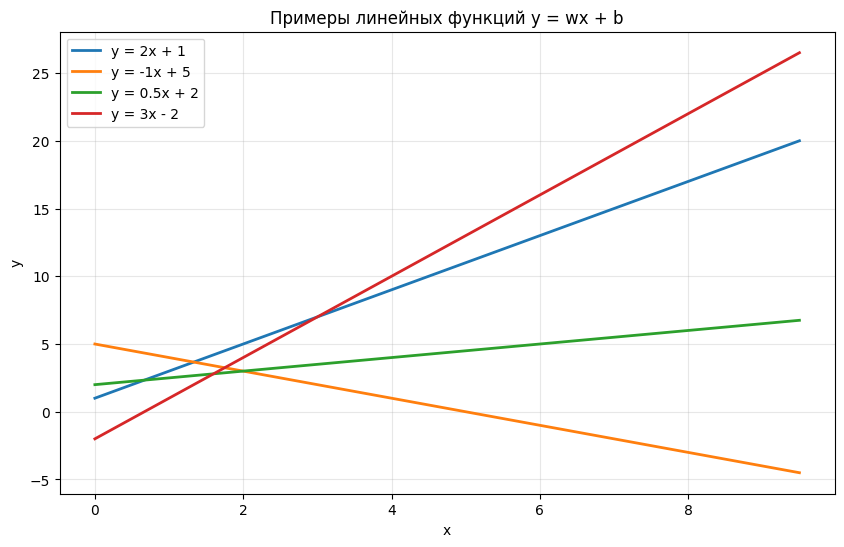

In [27]:
# Решение задания 1.1
# 1. Создаём x от 0 до 10 с шагом 0.5
x = np.arange(0, 10, 0.5)

# 2. Создаём 4 разные линии с разными параметрами
y1 = 2*x + 1      # w=2, b=1
y2 = -1*x + 5     # w=-1, b=5
y3 = 0.5*x + 2    # w=0.5, b=2
y4 = 3*x - 2      # w=3, b=-2

# 3. Строим все линии на одном графике
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='y = 2x + 1', linewidth=2)
plt.plot(x, y2, label='y = -1x + 5', linewidth=2)
plt.plot(x, y3, label='y = 0.5x + 2', linewidth=2)
plt.plot(x, y4, label='y = 3x - 2', linewidth=2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Примеры линейных функций y = wx + b')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### Задание 1.2: Создание данных с шумом и визуализация

**Теория:**
В реальных данных всегда есть шум - случайные отклонения от идеальной зависимости. Наша задача - найти линию, которая лучше всего описывает общую тенденцию.

**Задание:**
1. Создайте данные по формуле y = 3*x + 2 + шум
2. Визуализируйте исходные данные и истинную зависимость
3. Добавьте разное количество шума и посмотрите на результат

In [28]:
# Ваш код здесь
# 1. Создайте x от 0 до 10, 50 точек
np.random.seed(42)

# 2. Создайте "истинную" зависимость: y_true = 3*x + 2

# 3. Добавьте шум: y_noisy = y_true + np.random.normal(0, 1, len(x))

# 4. Постройте график:
# - scatter plot зашумленных данных
# - линию истинной зависимости (красная линия)
# - добавьте легенду и подписи осей

# 5. Создайте еще 2 датасета с разным уровнем шума (std=0.5 и std=2)
# Постройте их в subplot(1, 3) для сравнения

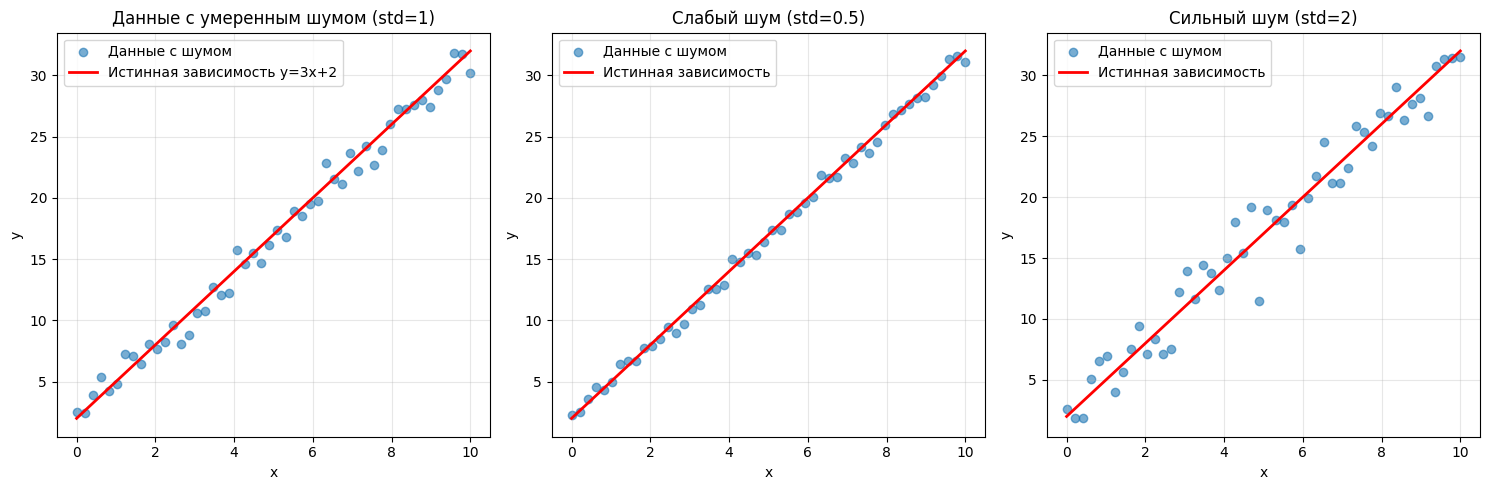

Наблюдения:
- При малом шуме точки близко к истинной линии
- При большом шуме труднее увидеть зависимость
- Задача модели - найти истинную зависимость несмотря на шум


In [29]:
# Решение задания 1.2
# 1. Создаём x от 0 до 10, 50 точек
np.random.seed(42)
x = np.linspace(0, 10, 50)

# 2. Создаём истинную зависимость
y_true = 3*x + 2

# 3. Добавляем шум
y_noisy = y_true + np.random.normal(0, 1, len(x))

# 4. Строим график основных данных
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x, y_noisy, alpha=0.6, label='Данные с шумом')
plt.plot(x, y_true, 'r-', linewidth=2, label='Истинная зависимость y=3x+2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Данные с умеренным шумом (std=1)')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Создаём датасеты с разным уровнем шума
np.random.seed(42)
y_low_noise = y_true + np.random.normal(0, 0.5, len(x))
y_high_noise = y_true + np.random.normal(0, 2, len(x))

plt.subplot(1, 3, 2)
plt.scatter(x, y_low_noise, alpha=0.6, label='Данные с шумом')
plt.plot(x, y_true, 'r-', linewidth=2, label='Истинная зависимость')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Слабый шум (std=0.5)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.scatter(x, y_high_noise, alpha=0.6, label='Данные с шумом')
plt.plot(x, y_true, 'r-', linewidth=2, label='Истинная зависимость')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Сильный шум (std=2)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Наблюдения:")
print("- При малом шуме точки близко к истинной линии")
print("- При большом шуме труднее увидеть зависимость")
print("- Задача модели - найти истинную зависимость несмотря на шум")

### Задание 1.3: Ручной подбор весов

**Теория:**
Прежде чем использовать автоматические алгоритмы, попробуем подобрать веса вручную, чтобы понять, как работает процесс обучения.

**Задание:**
1. Попробуйте разные значения весов и смещений
2. Вычислите ошибку для каждого варианта
3. Найдите наилучшие параметры визуально

In [30]:
# Ваш код здесь
# Используйте данные из предыдущего задания (x, y_noisy)

# 1. Попробуйте разные веса и смещения:
weights_to_try = [1, 2, 3, 4, 5]
biases_to_try = [0, 1, 2, 3, 4]

# 2. Для каждой комбинации:
# - вычислите предсказания: y_pred = w*x + b  
# - вычислите MSE c numpy 
# - сохраните результат

# 3. Найдите комбинацию с минимальной ошибкой

# 4. Постройте график:
# - исходные данные (scatter)
# - лучшую найденную линию
# - истинную линию для сравнения
# Выведите MSE лучшей модели

Результаты перебора:
w    b    MSE
---------------
3  2  0.91
3  1  1.45
3  3  2.36
3  0  4.00
3  4  5.81
2  4  16.22
4  0  20.94
2  3  22.77
4  1  28.39
2  2  31.32
4  2  37.84
2  1  41.87
4  3  49.29
2  0  54.42
4  4  62.74
1  4  93.98
5  0  105.22
1  3  110.53
5  1  122.67
1  2  129.08
5  2  142.12
1  1  149.63
5  3  163.57
1  0  172.18
5  4  187.02

Лучшие параметры: w=3, b=2
MSE: 0.91
Истинные параметры: w=3, b=2


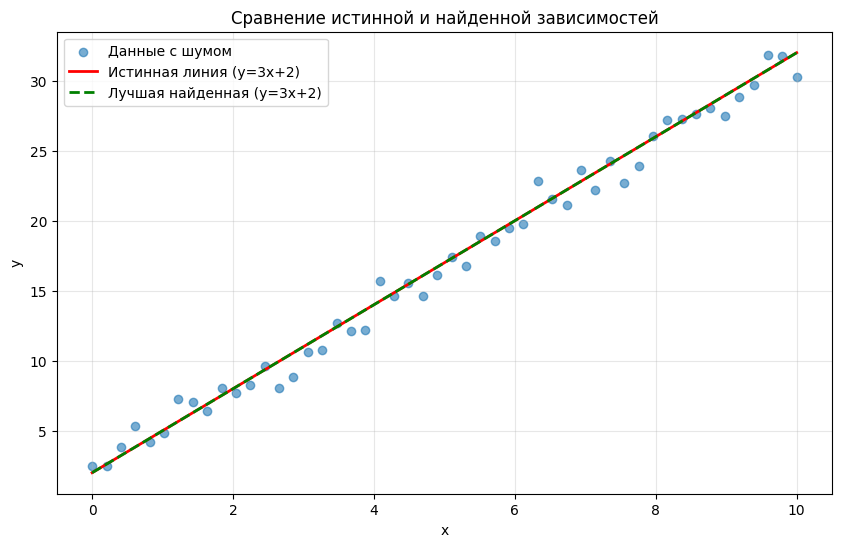

Разность с истинными параметрами:
Δw = 0
Δb = 0


In [31]:
# Решение задания 1.3
# Используем данные из предыдущего задания
weights_to_try = [1, 2, 3, 4, 5]
biases_to_try = [0, 1, 2, 3, 4]

best_mse = float('inf')
best_w = None
best_b = None
results = []

# 1-2. Перебираем все комбинации и вычисляем MSE
for w in weights_to_try:
    for b in biases_to_try:
        # Предсказания
        y_pred = w * x + b
        
        # MSE
        mse = np.mean((y_noisy - y_pred)**2)
        results.append((w, b, mse))
        
        # Запоминаем лучшую комбинацию
        if mse < best_mse:
            best_mse = mse
            best_w = w
            best_b = b

# 3. Выводим результаты
print("Результаты перебора:")
print("w    b    MSE")
print("-" * 15)
for w, b, mse in sorted(results, key=lambda x: x[2]):
    print(f"{w}  {b}  {mse:.2f}")

print(f"\nЛучшие параметры: w={best_w}, b={best_b}")
print(f"MSE: {best_mse:.2f}")
print(f"Истинные параметры: w=3, b=2")

# 4. Строим график сравнения
y_best = best_w * x + best_b

plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, alpha=0.6, label='Данные с шумом')
plt.plot(x, y_true, 'r-', linewidth=2, label=f'Истинная линия (y=3x+2)')
plt.plot(x, y_best, 'g--', linewidth=2, label=f'Лучшая найденная (y={best_w}x+{best_b})')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Сравнение истинной и найденной зависимостей')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Разность с истинными параметрами:")
print(f"Δw = {abs(best_w - 3)}")
print(f"Δb = {abs(best_b - 2)}")

### Задание 1.4: Введение в sklearn и автоматическое обучение

**Теория:**
Sklearn автоматически находит оптимальные веса, минимизируя функцию потерь (обычно MSE - среднеквадратичную ошибку).

**Задание:**
1. Используйте LinearRegression для автоматического поиска весов
2. Сравните с вашим ручным подбором
3. Изучите найденные коэффициенты

In [32]:
# Ваш код здесь
# 1. Подготовьте данные: x должен быть двумерным массивом
X = x.reshape(-1, 1)  # превращаем в столбец
y = y_noisy

# 2. Создайте и обучите модель
# обучите модель

# 3. Получите коэффициенты (поля класса coef_ и intercept_):

# 4. Сделайте предсказания и вычислите MSE (методы модели fit() и функция mean_squared_error())

# 5. Постройте график сравнения:
# - исходные данные
# - линия sklearn
# - ваша лучшая ручная линия  
# - истинная линия

# 6. Выведите найденные параметры и сравните их с истинными (w=3, b=2)

СРАВНЕНИЕ РЕЗУЛЬТАТОВ:
Истинные параметры:    w=3.00, b=2.00
Ручной подбор:         w=3.00, b=2.00, MSE=0.91
Sklearn LinearRegression: w=2.94, b=2.06, MSE=0.83


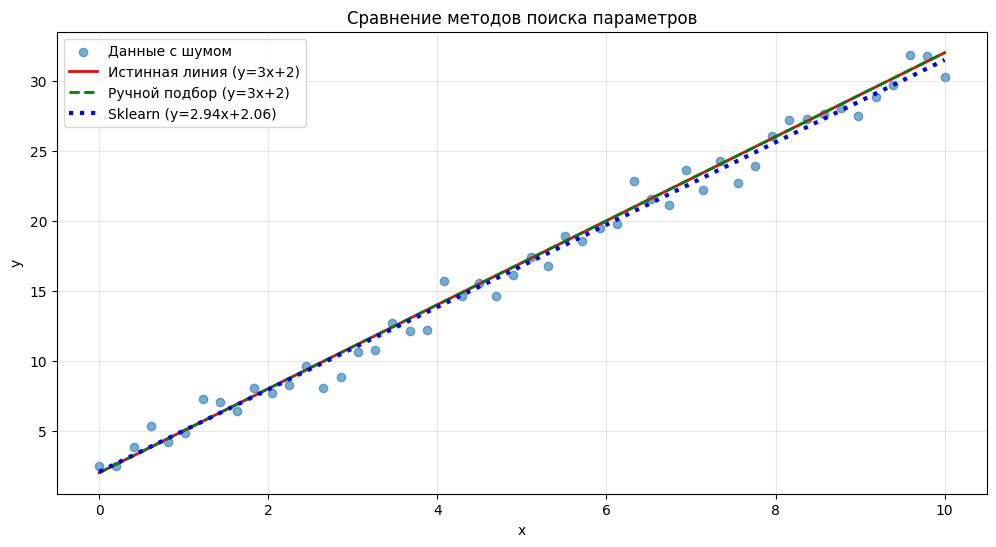

Точность относительно истинных параметров:
Ручной подбор: |Δw|=0.00, |Δb|=0.00
Sklearn:       |Δw|=0.06, |Δb|=0.06
Sklearn нашёл более точные параметры!


In [33]:
# Решение задания 1.4
# 1. Подготавливаем данные для sklearn
X = x.reshape(-1, 1)  # превращаем в столбец
y = y_noisy

# 2. Создаём и обучаем модель
model = LinearRegression()
model.fit(X, y)

# 3. Получаем коэффициенты
weight = model.coef_[0]  
bias = model.intercept_

# 4. Делаем предсказания и вычисляем MSE
y_pred = model.predict(X)
mse_sklearn = mean_squared_error(y, y_pred)

print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ:")
print("=" * 30)
print(f"Истинные параметры:    w=3.00, b=2.00")
print(f"Ручной подбор:         w={best_w}.00, b={best_b}.00, MSE={best_mse:.2f}")
print(f"Sklearn LinearRegression: w={weight:.2f}, b={bias:.2f}, MSE={mse_sklearn:.2f}")

# 5. Строим график сравнения
y_sklearn = weight * x + bias

plt.figure(figsize=(12, 6))
plt.scatter(x, y_noisy, alpha=0.6, label='Данные с шумом')
plt.plot(x, y_true, 'r-', linewidth=2, label='Истинная линия (y=3x+2)')
plt.plot(x, y_best, 'g--', linewidth=2, label=f'Ручной подбор (y={best_w}x+{best_b})')
plt.plot(x, y_sklearn, 'b:', linewidth=3, label=f'Sklearn (y={weight:.2f}x+{bias:.2f})')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Сравнение методов поиска параметров')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 6. Анализ точности
print("Точность относительно истинных параметров:")
print(f"Ручной подбор: |Δw|={abs(best_w - 3):.2f}, |Δb|={abs(best_b - 2):.2f}")
print(f"Sklearn:       |Δw|={abs(weight - 3):.2f}, |Δb|={abs(bias - 2):.2f}")
print("Sklearn нашёл более точные параметры!")

---

## Блок 2: Работа с многомерными данными

### Задание 2.1: Модель с несколькими признаками

**Теория:**
В реальности у нас обычно больше одного признака. Модель становится:
**y = w₁*x₁ + w₂*x₂ + w₃*x₃ + ... + b**

Каждый признак имеет свой вес, который показывает, насколько сильно этот признак влияет на результат.

**Задание:**
1. Создайте данные с 3 признаками
2. Изучите влияние каждого признака отдельно
3. Обучите модель и проанализируйте веса

In [34]:
# Ваш код здесь
# 1. Создайте синтетические данные:
np.random.seed(42)
n_samples = 100

# Массивы признаков с np.random.uniform с границами (0, 10), (1, 5) и (0, 1)

# Целевая переменная (например, зарплата)
# y = 2*возраст + 5*опыт + 10*образование + 20 + шум

# 2. Создайте X матрицу признаков

# 3. Постройте 3 графика зависимости y от каждого признака отдельно

# 4. Обучите LinearRegression и выведите веса
# Сравните найденные веса с истинными [2, 5, 10]

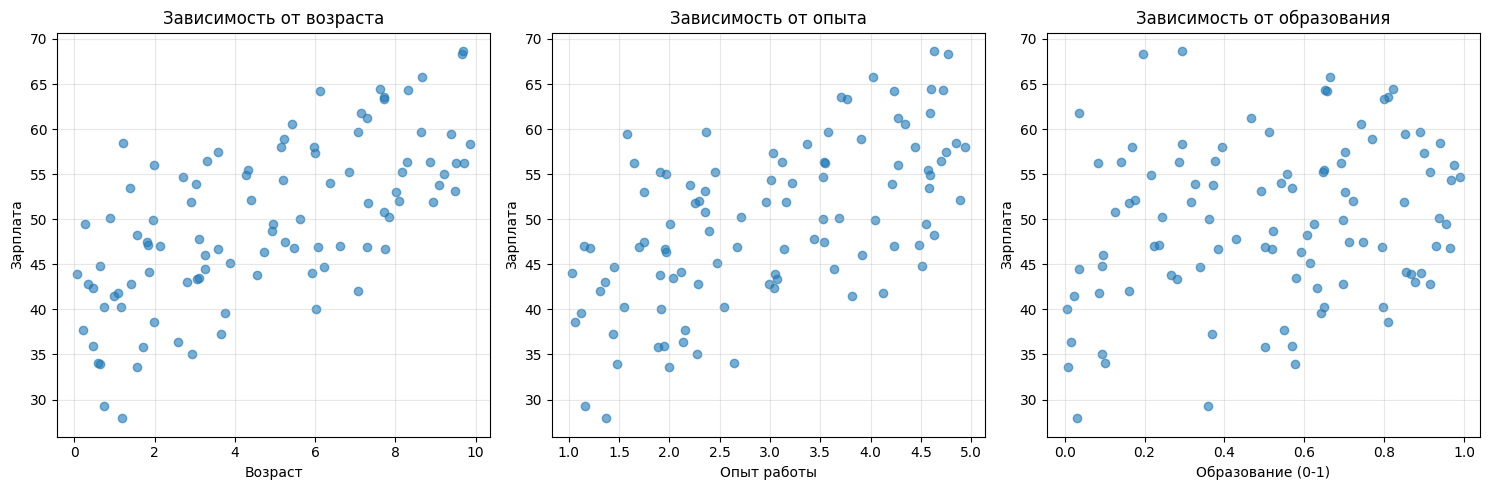

СРАВНЕНИЕ ВЕСОВ:
Признак         | Истинный | Найденный | Разность
--------------------------------------------------
Возраст         |      2.0 |      2.08 |     0.08
Опыт            |      5.0 |      5.10 |     0.10
Образование     |     10.0 |     10.66 |     0.66
Смещение (bias):
Истинное: 20.00
Найденное: 19.10
Разность: 0.90

MSE модели: 3.71


In [35]:
# Решение задания 2.1
# 1. Создаём синтетические данные
np.random.seed(42)
n_samples = 100

# Признаки
x1 = np.random.uniform(0, 10, n_samples)      # возраст (условно)
x2 = np.random.uniform(1, 5, n_samples)       # опыт работы  
x3 = np.random.uniform(0, 1, n_samples)       # образование (0-1)

# Целевая переменная (например, зарплата)
y_true = 2*x1 + 5*x2 + 10*x3 + 20
y = y_true + np.random.normal(0, 2, n_samples)

# 2. Создаём матрицу признаков
X = np.column_stack([x1, x2, x3])

# 3. Строим графики зависимости от каждого признака
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x1, y, alpha=0.6)
plt.xlabel('Возраст')
plt.ylabel('Зарплата')
plt.title('Зависимость от возраста')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.scatter(x2, y, alpha=0.6)
plt.xlabel('Опыт работы')
plt.ylabel('Зарплата')
plt.title('Зависимость от опыта')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.scatter(x3, y, alpha=0.6)
plt.xlabel('Образование (0-1)')
plt.ylabel('Зарплата')
plt.title('Зависимость от образования')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. Обучаем модель и анализируем веса
model_multi = LinearRegression()
model_multi.fit(X, y)

weights = model_multi.coef_
bias = model_multi.intercept_

print("СРАВНЕНИЕ ВЕСОВ:")
print("=" * 25)
print("Признак         | Истинный | Найденный | Разность")
print("-" * 50)
feature_names = ['Возраст', 'Опыт', 'Образование']
true_weights = [2, 5, 10]

for i, (name, true_w, found_w) in enumerate(zip(feature_names, true_weights, weights)):
    diff = abs(true_w - found_w)
    print(f"{name:15s} | {true_w:8.1f} | {found_w:9.2f} | {diff:8.2f}")

print("Смещение (bias):")
print(f"Истинное: 20.00")
print(f"Найденное: {bias:.2f}")
print(f"Разность: {abs(20 - bias):.2f}")

# Оценка качества
y_pred = model_multi.predict(X)
mse = mean_squared_error(y, y_pred)
print(f"\nMSE модели: {mse:.2f}")

### Задание 2.2: Влияние масштаба признаков

**Теория:**
Если признаки имеют очень разные масштабы, это может повлиять на веса модели. Например, возраст (20-60) и зарплата (20000-100000) имеют разные порядки.

**Задание:**
1. Создайте данные с признаками разного масштаба
2. Обучите модель без масштабирования
3. Примените StandardScaler и сравните результаты

In [36]:
# Ваш код здесь
# 1. Создайте данные с разными масштабами 20, 60 ; 20000, 100000 ; 0, 40:
np.random.seed(42)

# Целевая переменная (например, стоимость страховки)
#y = 0.1*age + 0.0001*income + 2*experience + 100 + шум

# 2. Обучите модель БЕЗ масштабирования
# обучите и получите коэффициенты

# 3. Примените StandardScaler, используйте fit_transform
scaler = StandardScaler()
# обучите на масштабированных данных

# 4. Сравните коэффициенты и MSE
# Постройте bar plot коэффициентов до и после масштабирования

# 5. Объясните, почему коэффициенты изменились

Масштабы признаков:
Возраст: 20.2 - 59.5
Доход: 20556 - 98852
Опыт: 0.2 - 39.6
СРАВНЕНИЕ РЕЗУЛЬТАТОВ:
Признак    | Истинный | Без масштаб. | С масштаб. | Разн.1 | Разн.2
----------------------------------------------------------------------
Возраст    |   0.1000 |     0.203982 |     2.4151 | 0.1040 | 2.3151
Доход      |   0.0001 |     0.000126 |     2.9414 | 0.0000 | 2.9413
Опыт       |   2.0000 |     2.082337 |    24.3180 | 0.0823 | 22.3180

MSE без масштабирования: 92.83
MSE с масштабированием:  92.83


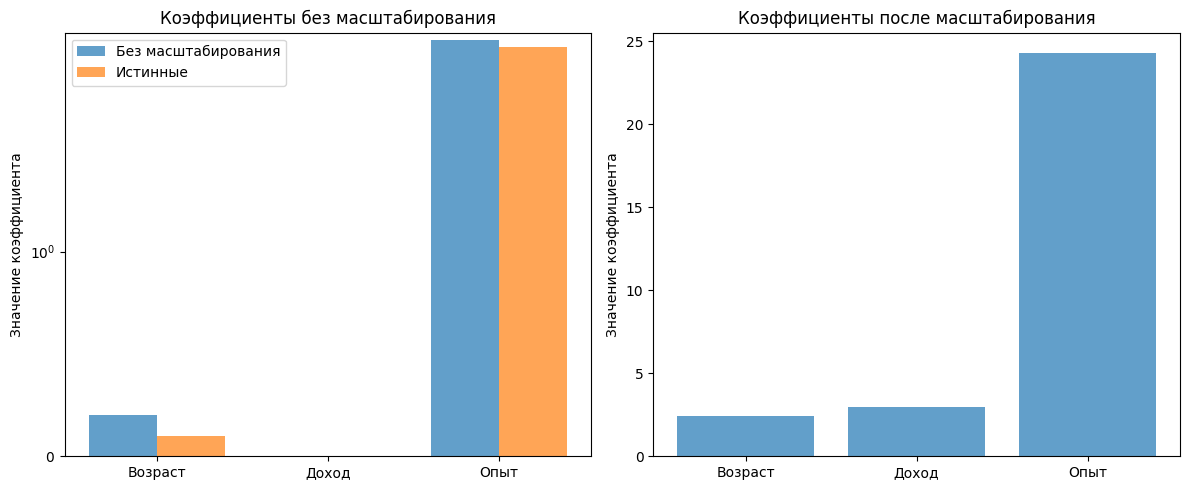

ОБЪЯСНЕНИЕ:
- Без масштабирования: коэффициент дохода очень маленький
  из-за большого масштаба признака (тысячи)
- С масштабированием: все коэффициенты сопоставимы по величине
- Качество модели (MSE) не изменилось - модель одинаково хорошо предсказывает


In [37]:
# Решение задания 2.2
# 1. Создаём данные с разными масштабами
np.random.seed(42)
age = np.random.uniform(20, 60, 100)           # возраст: 20-60
income = np.random.uniform(20000, 100000, 100) # доход: 20k-100k  
experience = np.random.uniform(0, 40, 100)     # опыт: 0-40 лет

# Целевая переменная (стоимость страховки)
y = 0.1*age + 0.0001*income + 2*experience + 100 + np.random.normal(0, 10, 100)

print("Масштабы признаков:")
print(f"Возраст: {age.min():.1f} - {age.max():.1f}")
print(f"Доход: {income.min():.0f} - {income.max():.0f}")
print(f"Опыт: {experience.min():.1f} - {experience.max():.1f}")

# 2. Обучаем модель БЕЗ масштабирования
X_raw = np.column_stack([age, income, experience])
model_raw = LinearRegression()
model_raw.fit(X_raw, y)

weights_raw = model_raw.coef_
mse_raw = mean_squared_error(y, model_raw.predict(X_raw))

# 3. Применяем StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)
model_scaled = LinearRegression()
model_scaled.fit(X_scaled, y)

weights_scaled = model_scaled.coef_
mse_scaled = mean_squared_error(y, model_scaled.predict(X_scaled))

# 4. Сравниваем результаты
feature_names = ['Возраст', 'Доход', 'Опыт']
true_weights = [0.1, 0.0001, 2.0]

print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ:")
print("=" * 60)
print("Признак    | Истинный | Без масштаб. | С масштаб. | Разн.1 | Разн.2")
print("-" * 70)

for i, name in enumerate(feature_names):
    true_w = true_weights[i]
    raw_w = weights_raw[i]
    scaled_w = weights_scaled[i]
    diff1 = abs(true_w - raw_w)
    diff2 = abs(true_w - scaled_w)
    print(f"{name:10s} | {true_w:8.4f} | {raw_w:12.6f} | {scaled_w:10.4f} | {diff1:6.4f} | {diff2:6.4f}")

print(f"\nMSE без масштабирования: {mse_raw:.2f}")
print(f"MSE с масштабированием:  {mse_scaled:.2f}")

# Визуализация коэффициентов
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
x_pos = np.arange(len(feature_names))
plt.bar(x_pos - 0.2, weights_raw, 0.4, label='Без масштабирования', alpha=0.7)
plt.bar(x_pos + 0.2, true_weights, 0.4, label='Истинные', alpha=0.7)
plt.xticks(x_pos, feature_names)
plt.ylabel('Значение коэффициента')
plt.title('Коэффициенты без масштабирования')
plt.legend()
plt.yscale('symlog')  # логарифмическая шкала из-за разных порядков

plt.subplot(1, 2, 2)
plt.bar(x_pos, weights_scaled, alpha=0.7)
plt.xticks(x_pos, feature_names)
plt.ylabel('Значение коэффициента')
plt.title('Коэффициенты после масштабирования')

plt.tight_layout()
plt.show()

print("ОБЪЯСНЕНИЕ:")
print("- Без масштабирования: коэффициент дохода очень маленький")
print("  из-за большого масштаба признака (тысячи)")
print("- С масштабированием: все коэффициенты сопоставимы по величине")
print("- Качество модели (MSE) не изменилось - модель одинаково хорошо предсказывает")

### Задание 2.3: Интерпретация весов модели

**Теория:**
Веса модели показывают, как изменится целевая переменная при изменении признака на единицу (при условии, что остальные признаки не изменяются).

**Задание:**
1. Обучите модель на осмысленных данных
2. Проинтерпретируйте каждый вес
3. Найдите самые важные признаки

In [38]:
# 1. Создаём реалистичные данные о недвижимости
np.random.seed(42)
n_houses = 200

area = np.random.uniform(50, 200, n_houses)        # кв.м
rooms = np.random.randint(1, 6, n_houses)           # количество
floor = np.random.randint(1, 20, n_houses)             # этаж
distance_center = np.random.uniform(1, 50, n_houses) # км от центра

# Цена квартиры (тыс. руб)
price = (area * 100 +           # 100 тыс за кв.м
        rooms * 500 +           # 500 тыс за комнату  
        floor * 10 +                # 10 тыс за этаж
        distance_center * (-20) +    # -20 тыс за км от центра
        5000 +                     # базовая цена
        np.random.normal(0, 500, n_houses))  # шум

# 2. Обучаем модель

# 3. Строим bar plot весов с подписями признаков
# Добавляем значения на столбцы

# 4. Выводим интерпретацию каждого веса

# 5. Ранжируем признаки по важности (по абсолютному значению весов)
# Качество модели


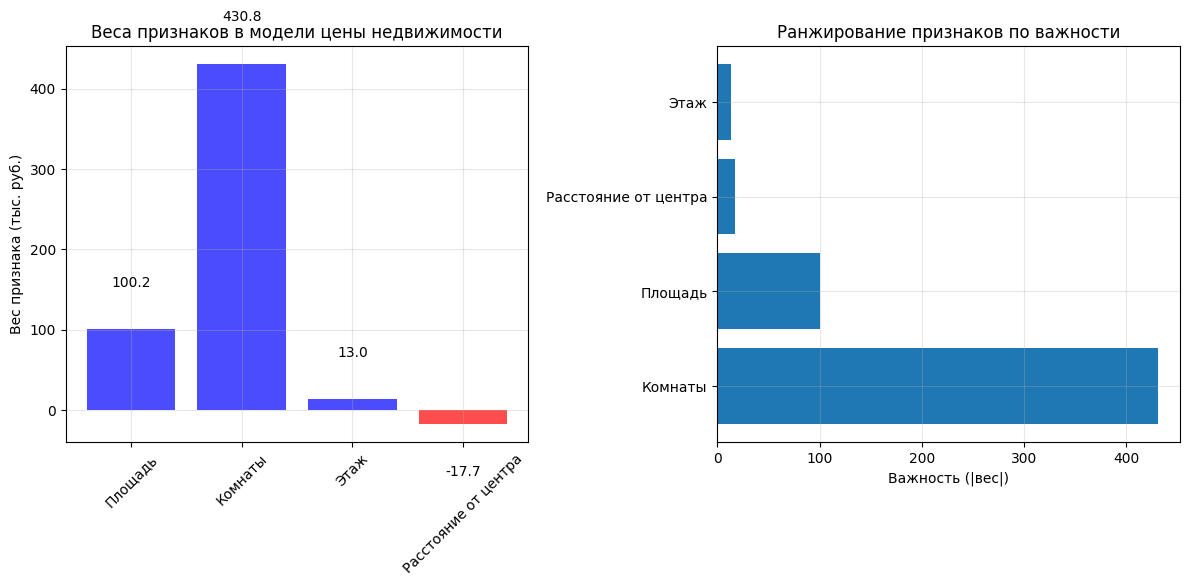

ИНТЕРПРЕТАЦИЯ ВЕСОВ:
Базовая цена: 5116 тыс. руб.

Площадь:
  При увеличении площади на 1 кв.м цена увеличивается на 100.2 тыс. руб.
  Истинное влияние: 100 тыс. руб.
  Ошибка: 0.2 тыс. руб.

Комнаты:
  При добавлении 1 комнаты цена увеличивается на 430.8 тыс. руб.
  Истинное влияние: 500 тыс. руб.
  Ошибка: 69.2 тыс. руб.

Этаж:
  При подъёме на 1 этаж цена изменяется на 13.0 тыс. руб.
  Истинное влияние: 10 тыс. руб.
  Ошибка: 3.0 тыс. руб.

Расстояние от центра:
  При удалении от центра на 1 км цена изменяется на -17.7 тыс. руб.
  Истинное влияние: -20 тыс. руб.
  Ошибка: 2.3 тыс. руб.

РАНЖИРОВАНИЕ ПО ВАЖНОСТИ:
1. Комнаты: +430.8 тыс. руб. (важность: 430.8)
2. Площадь: +100.2 тыс. руб. (важность: 100.2)
3. Расстояние от центра: -17.7 тыс. руб. (важность: 17.7)
4. Этаж: +13.0 тыс. руб. (важность: 13.0)

Качество модели MSE: 286846.62
Модель хорошо восстановила истинные зависимости!


In [39]:
# Решение задания 2.3
# 1. Создаём реалистичные данные о недвижимости
np.random.seed(42)
n_houses = 200

площадь = np.random.uniform(50, 200, n_houses)        # кв.м
комнаты = np.random.randint(1, 6, n_houses)           # количество
этаж = np.random.randint(1, 20, n_houses)             # этаж
расстояние_центр = np.random.uniform(1, 50, n_houses) # км от центра

# Цена квартиры (тыс. руб)
цена = (площадь * 100 +           # 100 тыс за кв.м
        комнаты * 500 +           # 500 тыс за комнату  
        этаж * 10 +                # 10 тыс за этаж
        расстояние_центр * (-20) + # -20 тыс за км от центра
        5000 +                     # базовая цена
        np.random.normal(0, 500, n_houses))  # шум

# 2. Обучаем модель
X = np.column_stack([площадь, комнаты, этаж, расстояние_центр])
feature_names = ['Площадь', 'Комнаты', 'Этаж', 'Расстояние от центра']

model_house = LinearRegression()
model_house.fit(X, цена)

weights = model_house.coef_
bias = model_house.intercept_
true_weights = [100, 500, 10, -20]

# 3. Строим bar plot весов
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
colors = ['red' if w < 0 else 'blue' for w in weights]
bars = plt.bar(feature_names, weights, color=colors, alpha=0.7)
plt.ylabel('Вес признака (тыс. руб.)')
plt.title('Веса признаков в модели цены недвижимости')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Добавляем значения на столбцы
for bar, weight in zip(bars, weights):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + (50 if height > 0 else -50),
             f'{weight:.1f}', ha='center', va='bottom' if height > 0 else 'top')

plt.subplot(1, 2, 2)
importance = np.abs(weights)
sorted_idx = np.argsort(importance)[::-1]
plt.barh(range(len(feature_names)), importance[sorted_idx])
plt.yticks(range(len(feature_names)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Важность (|вес|)')
plt.title('Ранжирование признаков по важности')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. Интерпретация каждого веса
print("ИНТЕРПРЕТАЦИЯ ВЕСОВ:")
print("=" * 50)
print(f"Базовая цена: {bias:.0f} тыс. руб.")
print()

interpretations = [
    "При увеличении площади на 1 кв.м цена увеличивается на {:.1f} тыс. руб.",
    "При добавлении 1 комнаты цена увеличивается на {:.1f} тыс. руб.",
    "При подъёме на 1 этаж цена изменяется на {:.1f} тыс. руб.",
    "При удалении от центра на 1 км цена изменяется на {:.1f} тыс. руб."
]

for name, weight, interpretation, true_weight in zip(feature_names, weights, interpretations, true_weights):
    print(f"{name}:")
    print(f"  {interpretation.format(weight)}")
    print(f"  Истинное влияние: {true_weight} тыс. руб.")
    print(f"  Ошибка: {abs(weight - true_weight):.1f} тыс. руб.")
    print()

# 5. Ранжирование по важности
print("РАНЖИРОВАНИЕ ПО ВАЖНОСТИ:")
print("=" * 30)
importance_ranking = sorted(zip(feature_names, weights, np.abs(weights)), 
                          key=lambda x: x[2], reverse=True)

for i, (name, weight, importance) in enumerate(importance_ranking, 1):
    print(f"{i}. {name}: {weight:+.1f} тыс. руб. (важность: {importance:.1f})")

# Качество модели
y_pred = model_house.predict(X)
mse = mean_squared_error(цена, y_pred)
print(f"\nКачество модели MSE: {mse:.2f}")
print("Модель хорошо восстановила истинные зависимости!")

---

## Блок 3: Кодирование категориальных признаков

### Задание 3.1: Проблема с категориальными данными

**Теория:**
Линейная регрессия работает только с числами. Если у нас есть категориальные признаки (пол, город, образование), их нужно преобразовать в числа.

**НЕ ПРАВИЛЬНО:** просто присвоить числа (Мужчина=1, Женщина=2) - это создает ложный порядок.

**ПРАВИЛЬНО:** использовать One-Hot Encoding - создать отдельную колонку для каждой категории.

**Задание:**
1. Создайте данные с категориальными признаками
2. Покажите проблему с обычным кодированием
3. Сравните с правильным подходом

In [40]:
# Ваш код здесь
# 1. Создайте данные о сотрудниках:
np.random.seed(42)
n_people = 150

age = np.random.uniform(25, 55, n_people)
experience = np.random.uniform(0, 30, n_people)

# Категориальные признаки
gender = np.random.choice(['Мужчина', 'Женщина'], n_people)
education = np.random.choice(['Среднее', 'Высшее', 'Магистр'], n_people)

# Зарплата зависит от всех факторов
base_salary = (age * 1000 + experience * 2000 + 30000)

# Добавляем влияние пола и образования
gender_bonus = np.where(gender == 'Мужчина', 5000, 0)  # условный пример

education_bonus = np.select([
    education == 'Среднее',
    education == 'Высшее', 
    education == 'Магистр'
], [0, 10000, 20000])

salary = base_salary + gender_bonus + education_bonus + np.random.normal(0, 3000, n_people)

# 2. Попробуйте НЕПРАВИЛЬНЫЙ способ - LabelEncoder
le_пол = LabelEncoder()
# Обучите модель с неправильным кодированием

# 3. Выведите веса и объясните, почему они могут быть неправильными

ИСТИННЫЕ ЗАВИСИМОСТИ:
Мужчина: +5000 к зарплате
Среднее образование: +0
Высшее образование: +10000
Магистр: +20000

Кодирование пола: {np.str_('Женщина'): 0, np.str_('Мужчина'): 1}
Кодирование образования: {np.str_('Высшее'): 0, np.str_('Магистр'): 1, np.str_('Среднее'): 2}
РЕЗУЛЬТАТЫ НЕПРАВИЛЬНОГО КОДИРОВАНИЯ:
Возраст: 989.00
Опыт: 2010.00
Пол (0/1): 3816.19
Образование (0/1/2): -5845.28


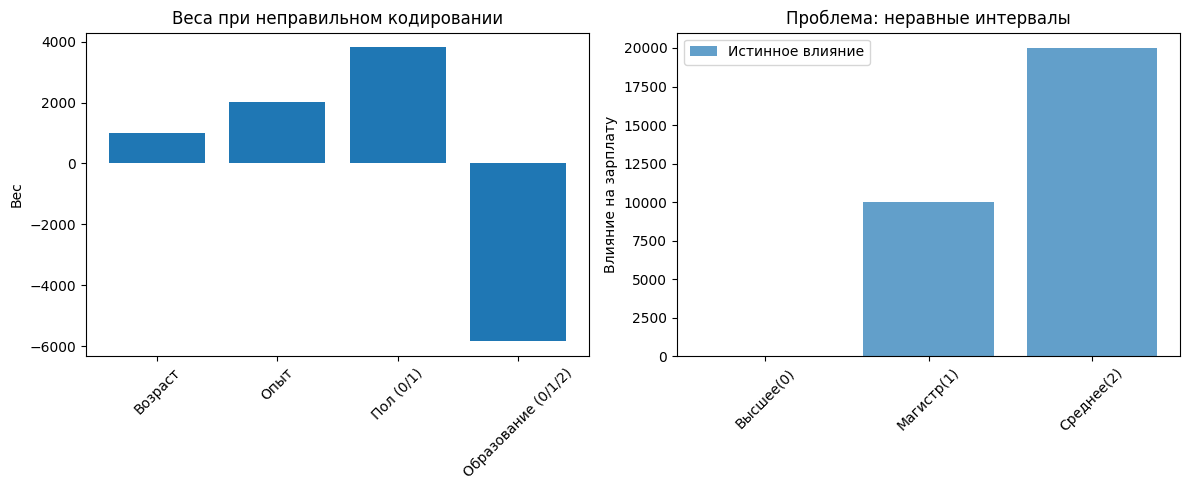

ПРОБЛЕМЫ НЕПРАВИЛЬНОГО КОДИРОВАНИЯ:
1. Создаётся ложный порядок: Высшее(0) < Магистр(1) < Среднее(2)
2. Модель думает, что разность Магистр-Высшее = Среднее-Магистр
3. На самом деле влияние образования: Среднее(0) < Высшее(10к) < Магистр(20к)
4. Числовое кодирование не отражает реальные отношения между категориями


In [41]:
# Решение задания 3.1
# 1. Создаём данные о сотрудниках
np.random.seed(42)
n_people = 150

возраст = np.random.uniform(25, 55, n_people)
опыт = np.random.uniform(0, 30, n_people)

# Категориальные признаки
пол = np.random.choice(['Мужчина', 'Женщина'], n_people)
образование = np.random.choice(['Среднее', 'Высшее', 'Магистр'], n_people)

# Зарплата зависит от всех факторов
зарплата_базовая = (возраст * 1000 + опыт * 2000 + 30000)

# Добавляем влияние пола и образования
пол_бонус = np.where(пол == 'Мужчина', 5000, 0)

образование_бонус = np.select([
    образование == 'Среднее',
    образование == 'Высшее', 
    образование == 'Магистр'
], [0, 10000, 20000])

зарплата = зарплата_базовая + пол_бонус + образование_бонус + np.random.normal(0, 3000, n_people)

print("ИСТИННЫЕ ЗАВИСИМОСТИ:")
print("Мужчина: +5000 к зарплате")
print("Среднее образование: +0")
print("Высшее образование: +10000") 
print("Магистр: +20000")

# 2. НЕПРАВИЛЬНЫЙ способ - LabelEncoder
le_пол = LabelEncoder()
пол_числа = le_пол.fit_transform(пол)

le_образование = LabelEncoder()  
образование_числа = le_образование.fit_transform(образование)

print(f"\nКодирование пола: {dict(zip(le_пол.classes_, range(len(le_пол.classes_))))}")
print(f"Кодирование образования: {dict(zip(le_образование.classes_, range(len(le_образование.classes_))))}")

# Обучаем модель с неправильным кодированием
X_wrong = np.column_stack([возраст, опыт, пол_числа, образование_числа])
model_wrong = LinearRegression()
model_wrong.fit(X_wrong, зарплата)

weights_wrong = model_wrong.coef_
feature_names_wrong = ['Возраст', 'Опыт', 'Пол (0/1)', 'Образование (0/1/2)']

print("РЕЗУЛЬТАТЫ НЕПРАВИЛЬНОГО КОДИРОВАНИЯ:")
print("=" * 45)
for name, weight in zip(feature_names_wrong, weights_wrong):
    print(f"{name}: {weight:.2f}")

# 3. Анализ проблем
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(feature_names_wrong, weights_wrong)
plt.title('Веса при неправильном кодировании')
plt.ylabel('Вес')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
# Показываем проблему с образованием
education_codes = sorted(zip(le_образование.classes_, range(len(le_образование.classes_))))
plt.bar([f"{edu}({code})" for edu, code in education_codes], 
        [0, 10000, 20000], alpha=0.7, label='Истинное влияние')
plt.title('Проблема: неравные интервалы')
plt.ylabel('Влияние на зарплату')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

print("ПРОБЛЕМЫ НЕПРАВИЛЬНОГО КОДИРОВАНИЯ:")
print("1. Создаётся ложный порядок: Высшее(0) < Магистр(1) < Среднее(2)")
print("2. Модель думает, что разность Магистр-Высшее = Среднее-Магистр")
print("3. На самом деле влияние образования: Среднее(0) < Высшее(10к) < Магистр(20к)")
print("4. Числовое кодирование не отражает реальные отношения между категориями")

### Задание 3.2: One-Hot Encoding - правильный способ

**Теория:**
One-Hot Encoding создает отдельную бинарную колонку для каждой категории:

Пол: Мужчина → [1, 0], Женщина → [0, 1]
Образование: Среднее → [1, 0, 0], Высшее → [0, 1, 0], Магистр → [0, 0, 1]

**Задание:**
1. Примените One-Hot Encoding к тем же данным
2. Сравните результаты с предыдущим подходом
3. Проинтерпретируйте новые веса

In [42]:
# Ваш код здесь
# Используйте данные из предыдущего задания

# 1. Примените OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Для пола
ohe_gender = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' избегает мультиколлинеарности
gender_onehot = ohe_gender.fit_transform(gender.reshape(-1, 1))

# Для образования
ohe_education = OneHotEncoder(sparse_output=False, drop='first')
education_onehot = ohe_education.fit_transform(education.reshape(-1, 1))

# 2. Создайте матрицу признаков

# 3. Обучите модель


# 4. Создайте названия признаков для интерпретации
feature_names = ['Возраст', 'Опыт'] + list(ohe_gender.get_feature_names_out(['Пол'])) + list(ohe_education.get_feature_names_out(['Образование']))

# 5. Постройте bar plot весов с подписями
# Проинтерпретируйте веса категориальных признаков

# 6. Сравните MSE между правильным и неправильным кодированием

ONE-HOT ENCODING:
Пол - базовая категория (drop): Женщина
Пол - кодируемая категория: Мужчина
Образование - базовая категория: Высшее
Образование - кодируемые категории: ['Магистр' 'Среднее']

Признаки после One-Hot Encoding: ['Возраст', 'Опыт', 'Пол_Мужчина', 'Образование_Магистр', 'Образование_Среднее']


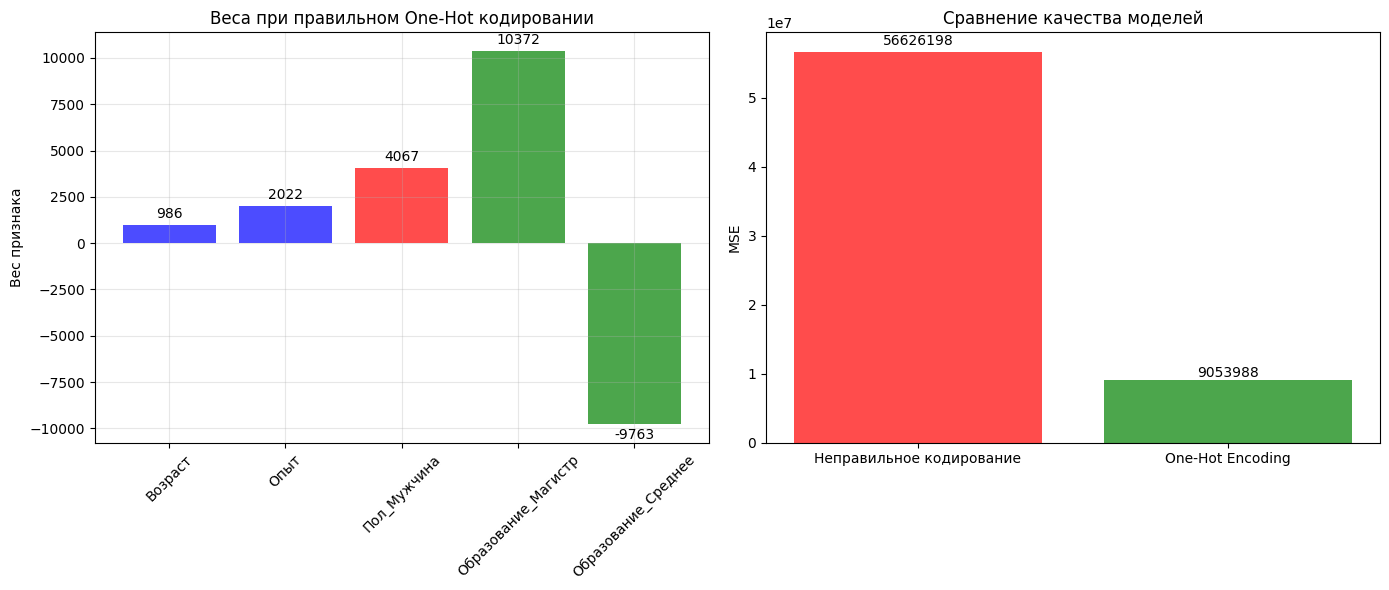

ИНТЕРПРЕТАЦИЯ ВЕСОВ (One-Hot Encoding):
Базовая зарплата: 40394 руб.
(для женщины с высшим образованием)

За каждый год возраста: +986 руб.
За каждый год опыта: +2022 руб.
Мужчина vs Женщина: +4067 руб.
Магистр vs Высшее: +10372 руб.
Среднее vs Высшее: -9763 руб.
Сравнение качества:
MSE неправильного кодирования: 56626198.19
MSE One-Hot Encoding: 9053987.95
Улучшение: 84.0%
Соответствие истинным зависимостям:
Мужчина бонус: истинный = +5000, найденный = +4067
Магистр бонус: истинный = +20000, найденный = +-9763
Среднее бонус: истинный = -10000, найденный = 10372


In [43]:
# Решение задания 3.2
# Используем данные из предыдущего задания

# 1. Применяем OneHotEncoder
# Для пола
ohe_пол = OneHotEncoder(sparse_output=False, drop='first')
пол_onehot = ohe_пол.fit_transform(пол.reshape(-1, 1))

# Для образования  
ohe_образование = OneHotEncoder(sparse_output=False, drop='first')
образование_onehot = ohe_образование.fit_transform(образование.reshape(-1, 1))

print("ONE-HOT ENCODING:")
print(f"Пол - базовая категория (drop): {ohe_пол.categories_[0][0]}")
print(f"Пол - кодируемая категория: {ohe_пол.categories_[0][1]}")
print(f"Образование - базовая категория: {ohe_образование.categories_[0][0]}")
print(f"Образование - кодируемые категории: {ohe_образование.categories_[0][1:]}")

# 2. Создаём матрицу признаков
X_correct = np.column_stack([возраст, опыт, пол_onehot, образование_onehot])

# 3. Обучаем модель
model_correct = LinearRegression()
model_correct.fit(X_correct, зарплата)

weights_correct = model_correct.coef_
bias_correct = model_correct.intercept_

# 4. Создаём названия признаков
feature_names = (['Возраст', 'Опыт'] + 
                list(ohe_пол.get_feature_names_out(['Пол'])) + 
                list(ohe_образование.get_feature_names_out(['Образование'])))

print(f"\nПризнаки после One-Hot Encoding: {feature_names}")

# 5. Строим график весов и интерпретируем
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
colors = ['blue', 'blue', 'red', 'green', 'green']
bars = plt.bar(range(len(weights_correct)), weights_correct, color=colors, alpha=0.7)
plt.xticks(range(len(feature_names)), feature_names, rotation=45)
plt.ylabel('Вес признака')
plt.title('Веса при правильном One-Hot кодировании')
plt.grid(True, alpha=0.3)

# Добавляем значения на столбцы
for bar, weight in zip(bars, weights_correct):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + (200 if height > 0 else -200),
             f'{weight:.0f}', ha='center', va='bottom' if height > 0 else 'top')

# Сравнение MSE
mse_wrong = mean_squared_error(зарплата, model_wrong.predict(X_wrong))
mse_correct = mean_squared_error(зарплата, model_correct.predict(X_correct))

plt.subplot(1, 2, 2)
methods = ['Неправильное кодирование', 'One-Hot Encoding']
mse_values = [mse_wrong, mse_correct]
bars = plt.bar(methods, mse_values, color=['red', 'green'], alpha=0.7)
plt.ylabel('MSE')
plt.title('Сравнение качества моделей')

for bar, mse in zip(bars, mse_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{mse:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 6. Интерпретация весов
print("ИНТЕРПРЕТАЦИЯ ВЕСОВ (One-Hot Encoding):")
print("=" * 50)
print(f"Базовая зарплата: {bias_correct:.0f} руб.")
print("(для женщины с высшим образованием)")
print()

interpretations = {
    'Возраст': 'За каждый год возраста: +{:.0f} руб.',
    'Опыт': 'За каждый год опыта: +{:.0f} руб.',
    'Пол_Мужчина': 'Мужчина vs Женщина: +{:.0f} руб.',
    'Образование_Магистр': 'Магистр vs Высшее: +{:.0f} руб.',
    'Образование_Среднее': 'Среднее vs Высшее: {:.0f} руб.'
}

for name, weight in zip(feature_names, weights_correct):
    if name in interpretations:
        print(interpretations[name].format(weight))

print("Сравнение качества:")
print(f"MSE неправильного кодирования: {mse_wrong:.2f}")
print(f"MSE One-Hot Encoding: {mse_correct:.2f}")
print(f"Улучшение: {((mse_wrong - mse_correct) / mse_wrong * 100):.1f}%")

# Проверяем соответствие истинным значениям
print("Соответствие истинным зависимостям:")
print(f"Мужчина бонус: истинный = +5000, найденный = +{weights_correct[2]:.0f}")
print(f"Магистр бонус: истинный = +20000, найденный = +{weights_correct[4]:.0f}")
print(f"Среднее бонус: истинный = -10000, найденный = {weights_correct[3]:.0f}")

### Задание 3.3: Работа с ColumnTransformer

**Теория:**
ColumnTransformer позволяет применять разные виды предобработки к разным типам признаков одновременно.

**Задание:**
1. Создайте данные со смешанными типами признаков
2. Используйте ColumnTransformer для автоматической обработки
3. Создайте полный pipeline

In [ ]:
# Ваш код здесь
# 1. Создайте DataFrame с разными типами данных
data = pd.DataFrame({
    'возраст': age,
    'опыт': experience,
    'пол': gender,
    'образование': education,
    'зарплата': salary
})

# 2. Разделите на признаки и целевую переменную методами pandas

# 3. Определите числовые и категориальные признаки
numeric_features = ['age', 'experience']
categorical_features = ['gender', 'education']

# 4. Создайте ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# 5. Создайте Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


"""
Справка по разбиению на тестовую и обучающуюю выборки

Чтобы протестировать работу модели полезно разбить данные на обучающую и тестовую выборки.
Это позволяет оценить, как модель будет работать на новых, не видимых данных.

Это можно сделать с помощью функции из sklearn train_test_split(),
Она принимает - массив признаков (X) и массив целевой переменной (y), 
а также параметры test_size и random_state.
Выдает - 4 массива: X_train, X_test, y_train, y_test
"""


# 6. Разделите данные на train/test и обучите pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Обучите и оцените модель
# Выведите MSE на train и test

ValueError: Found input variables with inconsistent numbers of samples: [200, 100]

Структура данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   возраст      150 non-null    float64
 1   опыт         150 non-null    float64
 2   пол          150 non-null    object 
 3   образование  150 non-null    object 
 4   зарплата     150 non-null    float64
dtypes: float64(3), object(2)
memory usage: 6.0+ KB
None
Первые 5 строк:
     возраст       опыт      пол образование       зарплата
0  36.236204  27.247977  Мужчина     Среднее  124929.954810
1  53.521429   7.186857  Женщина      Высшее  107583.619280
2  46.959818   4.346846  Женщина      Высшее   98184.232648
3  42.959755  14.683583  Женщина      Высшее  109127.955708
4  29.680559  29.569514  Мужчина      Высшее  131714.146132

Числовые признаки: ['возраст', 'опыт']
Категориальные признаки: ['пол', 'образование']
Размеры наборов данных:
Train: (120, 4), Test: (30, 4)
РЕЗУЛЬТА

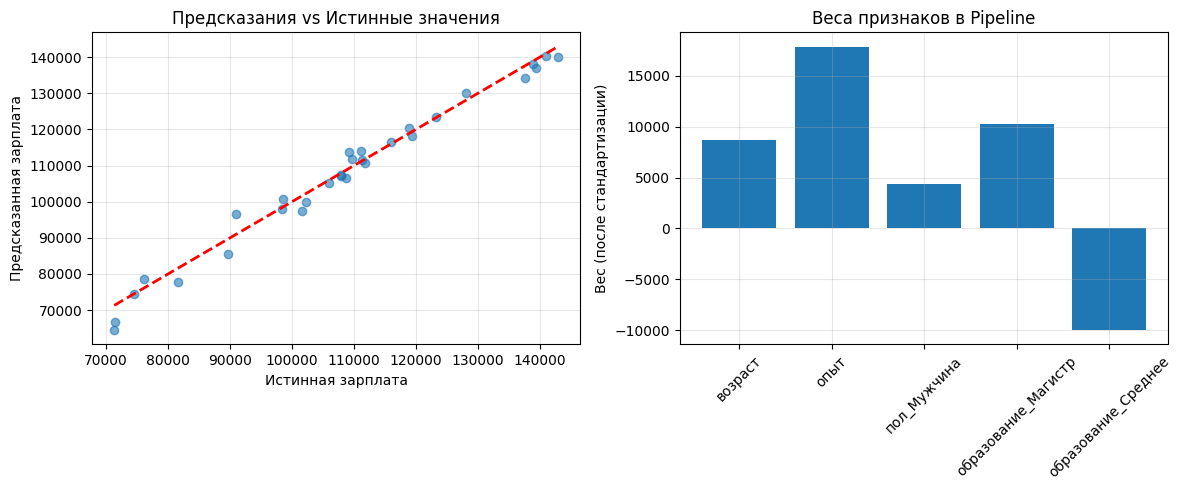

Преимущества Pipeline:
1. Автоматическая предобработка разных типов признаков
2. Избежание data leakage (StandardScaler fit только на train)
3. Удобство использования для новых данных
4. Единый интерфейс для всего процесса обучения


In [47]:
# Решение задания 3.3
# 1. Создаём DataFrame с разными типами данных
data = pd.DataFrame({
    'возраст': возраст,
    'опыт': опыт,
    'пол': пол,
    'образование': образование,
    'зарплата': зарплата
})

print("Структура данных:")
print(data.info())
print("Первые 5 строк:")
print(data.head())

# 2. Разделяем на признаки и целевую переменную
X = data.drop('зарплата', axis=1)
y = data['зарплата']

# 3. Определяем типы признаков
numeric_features = ['возраст', 'опыт']
categorical_features = ['пол', 'образование']

print(f"\nЧисловые признаки: {numeric_features}")
print(f"Категориальные признаки: {categorical_features}")

# 4. Создаём ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# 5. Создаём Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 6. Разделяем данные на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Размеры наборов данных:")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

# 7. Обучаем и оцениваем модель
pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("РЕЗУЛЬТАТЫ PIPELINE:")
print("=" * 25)
print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE:  {test_mse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE:  {test_mae:.2f}")

# Извлекаем веса из pipeline
model = pipeline.named_steps['regressor']
weights = model.coef_
bias = model.intercept_

# Получаем названия признаков после предобработки
ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
feature_names_final = (numeric_features + 
                      list(ohe.get_feature_names_out(categorical_features)))

print("Признаки после предобработки:")
for i, name in enumerate(feature_names_final):
    print(f"{i+1}. {name}: {weights[i]:.2f}")

# Визуализация результатов
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Истинная зарплата')
plt.ylabel('Предсказанная зарплата')
plt.title('Предсказания vs Истинные значения')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.bar(range(len(weights)), weights)
plt.xticks(range(len(feature_names_final)), feature_names_final, rotation=45)
plt.ylabel('Вес (после стандартизации)')
plt.title('Веса признаков в Pipeline')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Преимущества Pipeline:")
print("1. Автоматическая предобработка разных типов признаков")
print("2. Избежание data leakage (StandardScaler fit только на train)")
print("3. Удобство использования для новых данных")
print("4. Единый интерфейс для всего процесса обучения")